In [1]:
import sys

sys.path.append("..")

In [2]:
import datasets
import datasets.transform
import torch_utils

from py_utils.src import utils_img

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
datasets.list_data()

['VL_CMU_CD', 'VL_CMU_CD_Diff_View', 'PSCD', 'PSCD_Diff_View', 'PSCD_Full']

    VL_CMU_CD

In [5]:
mode = "train"
mode = "val"
mode = "test"

adj_dist = -1
adj_dist = 1
adj_dist = -5
adj_dist = 5

dataset1 = datasets.get_dataset(
    "VL_CMU_CD",
    mode=mode,
)

dataset2 = datasets.get_dataset(
    "VL_CMU_CD_Diff_View",
    mode=mode,
    adjacent_distance=adj_dist,
)

len(dataset1), len(dataset2)

(429, 181)

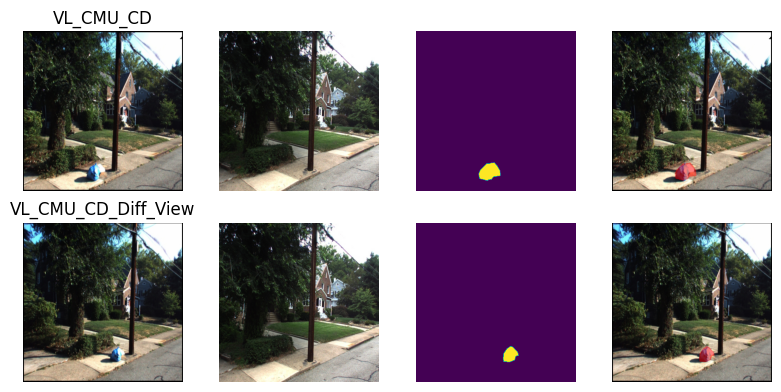

In [6]:
# get item

t0_1, t1_1, mask_1 = dataset1[99]
t0_2, t1_2, mask_2 = dataset2[37]

fig, axs = plt.subplots(2, 4, figsize=(8, 4))
axs[0, 0].imshow(t0_1)
axs[0, 1].imshow(t1_1)
axs[0, 2].imshow(mask_1)
axs[0, 3].imshow(
    utils_img.overlay_image(t0_1, [1, 0, 0], ratio=0.5, mask=mask_1),
)

axs[1, 0].imshow(t0_2)
axs[1, 1].imshow(t1_2)
axs[1, 2].imshow(mask_2)
axs[1, 3].imshow(
    utils_img.overlay_image(t0_2, [1, 0, 0], ratio=0.5, mask=mask_2),
)

axs[0, 0].set_title("VL_CMU_CD")
axs[1, 0].set_title("VL_CMU_CD_Diff_View")

for i in axs.ravel():
    i.axis("off")

fig.tight_layout()

original dataset has 429 samples
filtered dataset has 224 samples


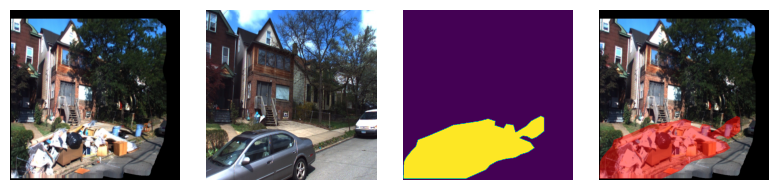

In [7]:
# locate
# uncomment to check each option

# option 1: slice
s = slice(None, 120, 10)
d = dataset1.loc(s)

# option 2: index
d = dataset1.loc(200)

# option 3: list of numbers
d = dataset1.loc([200, 100, 9])

# option 4: list of boolean values
d = dataset1.loc(np.random.randint(0, 2, size=len(dataset1)).astype(bool))

#################
### visualize ###
#################

print("original dataset has", len(dataset1), "samples")
print("filtered dataset has", len(d), "samples")

t0, t1, mask = d[0]

fig, axs = plt.subplots(1, 4, figsize=(8, 2))
axs[0].imshow(t0)
axs[1].imshow(t1)
axs[2].imshow(mask)
axs[3].imshow(utils_img.overlay_image(t0, [1, 0, 0], ratio=0.5, mask=mask))

for i in axs:
    i.axis("off")

fig.tight_layout()

In [8]:
# propoerties (uncomment to check each property)

s = slice(None, 10, None)

dataset1.filenames[s]
dataset1.group_ids[s]
dataset1.angles[s]
dataset1.seq_ids[s]
dataset1.figsize

array([512, 512])

    PSCD_Full

In [9]:
name = "PSCD_Full"

mode = "train"
mode = "val"
mode = "test"

dataset = datasets.get_dataset(name, mode=mode)

len(dataset)

77

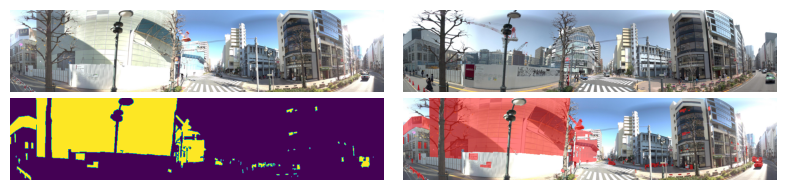

In [10]:
# get item

t0, t1, mask_0, mask_1 = dataset[10]

fig, axs = plt.subplots(2, 2, figsize=(8, 2))
axs[0, 0].imshow(t0)
axs[0, 1].imshow(t1)
axs[1, 0].imshow(mask_0)
axs[1, 1].imshow(utils_img.overlay_image(t0, [1, 0, 0], ratio=0.5, mask=mask_0))

for i in axs.ravel():
    i.axis("off")

fig.tight_layout()

In [11]:
# propoerties (uncomment to check each property)

dataset.filenames
dataset.figsize

array([ 224, 1024])

    PSCD

In [12]:
adj_dist = -1
adj_dist = 1
adj_dist = -2
adj_dist = 2

dataset1 = datasets.get_dataset("PSCD", mode=mode)
dataset2 = datasets.get_dataset(
    "PSCD_Diff_View",
    mode=mode,
    adjacent_distance=adj_dist,
)

len(dataset1), len(dataset2)

(1155, 1001)

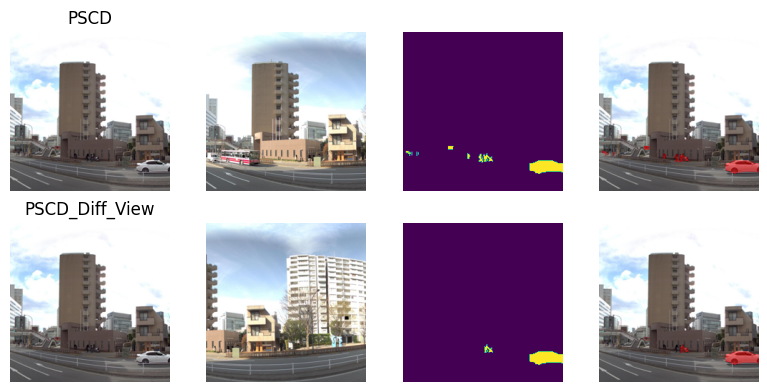

In [13]:
# get item

t0_1, t1_1, mask_1 = dataset1[10]
t0_2, t1_2, mask_2 = dataset2[10]

fig, axs = plt.subplots(2, 4, figsize=(8, 4))
axs[0, 0].imshow(t0_1)
axs[0, 1].imshow(t1_1)
axs[0, 2].imshow(mask_1)
axs[0, 3].imshow(
    utils_img.overlay_image(t0_1, [1, 0, 0], ratio=0.5, mask=mask_1),
)

axs[1, 0].imshow(t0_2)
axs[1, 1].imshow(t1_2)
axs[1, 2].imshow(mask_2)
axs[1, 3].imshow(
    utils_img.overlay_image(t0_2, [1, 0, 0], ratio=0.5, mask=mask_2),
)

axs[0, 0].set_title("PSCD")
axs[1, 0].set_title("PSCD_Diff_View")

for i in axs.ravel():
    i.axis("off")

fig.tight_layout()

In [14]:
# propoerties (uncomment to check each property)

dataset1.original_filenames
dataset1.filenames
dataset1.figsize

array([224, 224])

    torch_utils demonstration

In [15]:
from torchvision import transforms as tvf

original    dataset has 429 samples
transformed dataset has 429 samples


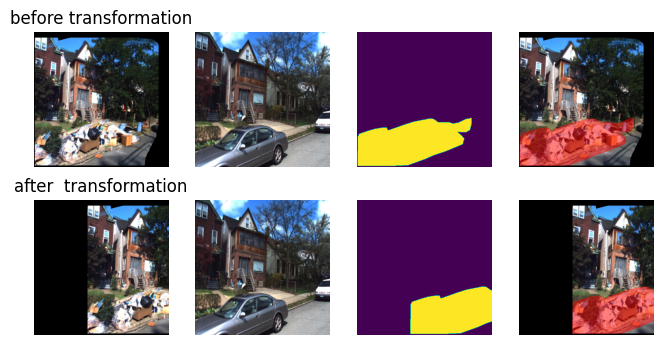

In [16]:
# transformation (specify translate pixel and rotate degree)

dataset_before = datasets.get_dataset("VL_CMU_CD", mode="test")

dataset_after = torch_utils.CDDataWrapper(
    dataset_before,
    transform=tvf.ToTensor(),
    target_transform=tvf.ToTensor(),
    translate0=(200, 0),
    translate1=(0, -0),
    rotate_angle0=0,
    rotate_angle1=0,
    hflip_prob=0.0,
)

print("original    dataset has", len(dataset_before), "samples")
print("transformed dataset has", len(dataset_after), "samples")

t0_before, t1_before, mask_before = dataset_before[0]
t0_after, t1_after, mask_after = dataset_after[0]

t0_after = t0_after.numpy().transpose(1, 2, 0)
t1_after = t1_after.numpy().transpose(1, 2, 0)
mask_after = mask_after.numpy().squeeze()

fig, axs = plt.subplots(2, 4, figsize=(8, 4))

axs[0, 0].imshow(t0_before)
axs[0, 1].imshow(t1_before)
axs[0, 2].imshow(mask_before)
axs[0, 3].imshow(
    utils_img.overlay_image(t0_before, [1, 0, 0], ratio=0.5, mask=mask_before)
)

axs[1, 0].imshow(t0_after)
axs[1, 1].imshow(t1_after)
axs[1, 2].imshow(mask_after)
axs[1, 3].imshow(
    utils_img.overlay_image(t0_after, [1, 0, 0], ratio=0.5, mask=mask_after)
)

axs[0, 0].set_title("before transformation")
axs[1, 0].set_title("after  transformation")

for i in axs.ravel():
    i.axis("off")

original    dataset has 429 samples
transformed dataset has 429 samples


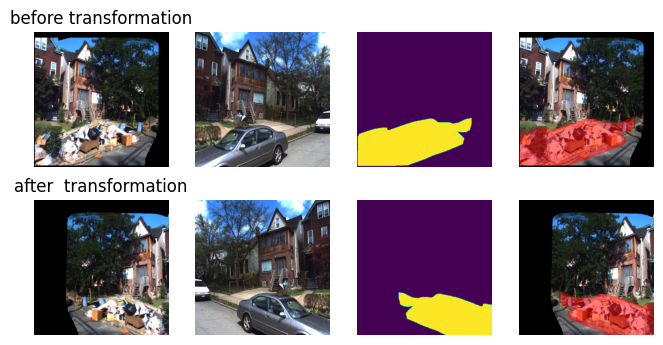

In [17]:
# transformation (randomly transformation)

dataset_before = datasets.get_dataset("VL_CMU_CD", mode="test")

dataset_after = torch_utils.CDDataWrapper(
    dataset_before,
    transform=tvf.ToTensor(),
    target_transform=tvf.ToTensor(),
    hflip_prob=0.9,
    augment_diff_degree=20,
    augment_diff_translate=[-100, 100],
)

print("original    dataset has", len(dataset_before), "samples")
print("transformed dataset has", len(dataset_after), "samples")

t0_before, t1_before, mask_before = dataset_before[0]
t0_after, t1_after, mask_after = dataset_after[0]

t0_after = t0_after.numpy().transpose(1, 2, 0)
t1_after = t1_after.numpy().transpose(1, 2, 0)
mask_after = mask_after.numpy().squeeze()

fig, axs = plt.subplots(2, 4, figsize=(8, 4))

axs[0, 0].imshow(t0_before)
axs[0, 1].imshow(t1_before)
axs[0, 2].imshow(mask_before)
axs[0, 3].imshow(
    utils_img.overlay_image(t0_before, [1, 0, 0], ratio=0.5, mask=mask_before)
)

axs[1, 0].imshow(t0_after)
axs[1, 1].imshow(t1_after)
axs[1, 2].imshow(mask_after)
axs[1, 3].imshow(
    utils_img.overlay_image(t0_after, [1, 0, 0], ratio=0.5, mask=mask_after)
)

axs[0, 0].set_title("before transformation")
axs[1, 0].set_title("after  transformation")

for i in axs.ravel():
    i.axis("off")